<a href="https://colab.research.google.com/github/AliArabi55/Dete-net-50/blob/coco-data-setup/Copy_of_detr_resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers

Model page: https://huggingface.co/facebook/detr-resnet-50

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/facebook/detr-resnet-50)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [2]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [3]:
# Load model directly
from transformers import AutoImageProcessor, AutoModelForObjectDetection

processor = AutoImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = AutoModelForObjectDetection.from_pretrained("facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

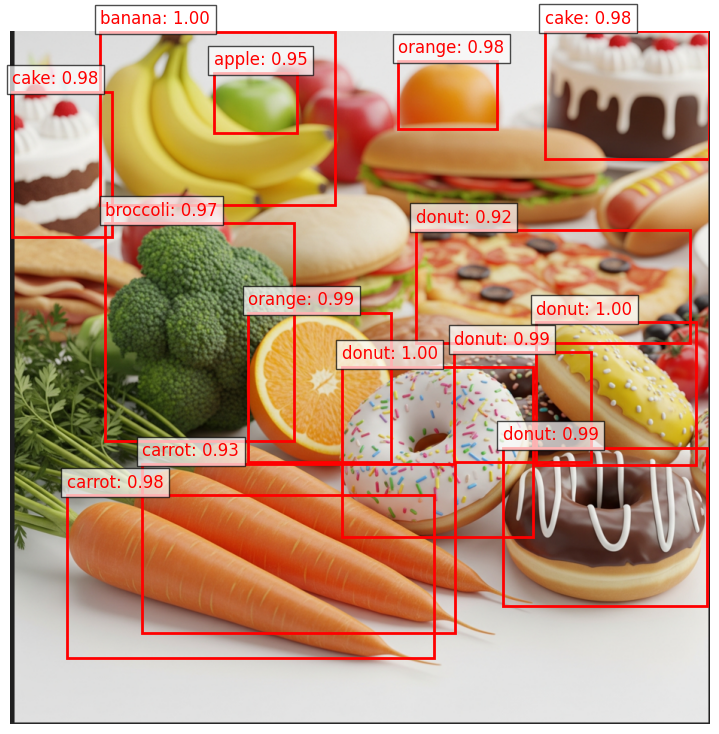


Detected Objects:
  - Object: carrot, Confidence: 0.98, Bounding Box: [75.29, 617.39, 563.31, 833.64]
  - Object: orange, Confidence: 0.99, Bounding Box: [316.61, 374.41, 506.1, 573.44]
  - Object: donut, Confidence: 0.99, Bounding Box: [590.32, 426.7, 772.91, 572.91]
  - Object: donut, Confidence: 1.00, Bounding Box: [699.61, 386.66, 912.4, 577.28]
  - Object: donut, Confidence: 0.99, Bounding Box: [655.02, 554.12, 927.16, 764.51]
  - Object: cake, Confidence: 0.98, Bounding Box: [710.84, 0.03, 929.99, 170.08]
  - Object: cake, Confidence: 0.98, Bounding Box: [2.59, 80.35, 134.8, 273.32]
  - Object: apple, Confidence: 0.95, Bounding Box: [270.34, 55.24, 380.79, 135.27]
  - Object: banana, Confidence: 1.00, Bounding Box: [119.89, 0.47, 432.22, 231.52]
  - Object: broccoli, Confidence: 0.97, Bounding Box: [126.48, 254.85, 377.28, 544.64]
  - Object: carrot, Confidence: 0.93, Bounding Box: [175.55, 575.14, 591.53, 799.86]
  - Object: donut, Confidence: 0.92, Bounding Box: [539.33, 264.4

In [8]:
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import DetrImageProcessor, DetrForObjectDetection

# 1. تحميل النموذج والمعالج المناسبين
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")

# 2. تحميل الصورة
image_path = "/content/download (2).png"
image = Image.open(image_path).convert("RGB")  # تأكد من تحويل الصورة إلى RGB

# 3. تجهيز الصورة للنموذج
inputs = processor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)

# 4. معالجة المخرجات للحصول على الكائنات المكتشفة
target_sizes = torch.tensor([image.size[::-1]])  # PIL يعطي الحجم كـ (width, height)، نحتاج (height, width)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# 5. عرض الصورة مع البوكسات والعناوين
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_name = model.config.id2label[label.item()]
    confidence = round(score.item(), 3)

    # رسم البوكس
    rect = patches.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1],
        linewidth=2, edgecolor='red', facecolor='none'
    )
    ax.add_patch(rect)

    # وضع اسم الكائن والدقة
    ax.text(box[0], box[1] - 10, f"{label_name}: {confidence:.2f}",
            color='red', fontsize=12,
            bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()

# 6. طباعة النتائج النصية
print("\nDetected Objects:")
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    label_name = model.config.id2label[label.item()]
    confidence = round(score.item(), 3)
    box = [round(i, 2) for i in box.tolist()]
    print(f"  - Object: {label_name}, Confidence: {confidence:.2f}, Bounding Box: {box}")


In [ ]:
# Download a different sample image
!wget https://raw.githubusercontent.com/ultralytics/yolov5/master/data/images/zidane.jpg -O /content/download.png

##✅ خطوات تشغيل DETR على COCO val2017 لـ 27 صنف غذائي

In [9]:
!mkdir -p /content/coco

# تحميل الصور
!wget http://images.cocodataset.org/zips/val2017.zip -P /content/coco
!unzip -q /content/coco/val2017.zip -d /content/coco

# تحميل التعليقات التوضيحية (annotations)
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -P /content/coco
!unzip -q /content/coco/annotations_trainval2017.zip -d /content/coco


--2025-06-12 08:14:21--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.136.137, 52.217.201.185, 16.15.192.110, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.136.137|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘/content/coco/val2017.zip’

val2017.zip         100%[===================>] 777.80M  55.9MB/s    in 14s     

2025-06-12 08:14:36 (54.6 MB/s) - ‘/content/coco/val2017.zip’ saved [815585330/815585330]

--2025-06-12 08:14:42--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.20.177, 52.216.92.219, 52.216.41.49, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.20.177|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘/content/coco/annotation

##🍽️ الخطوة 2: تحديد الفئات الغذائية (Mapping)

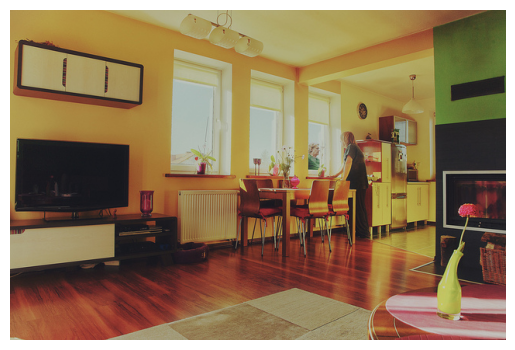

In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# صورة مثال
image_path = "/content/coco/val2017/000000000139.jpg"
image = Image.open(image_path).convert("RGB")

# التحضير والتنبؤ
inputs = processor(images=image, return_tensors="pt").to(model.device)
outputs = model(**inputs)

# post-processing
target_sizes = torch.tensor([image.size[::-1]], device=model.device)
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# الفئات الغذائية المتوفرة
food_class_ids = [52, 53, 54, 55, 56, 57, 58, 59, 60, 61]

# العرض
fig, ax = plt.subplots(1)
ax.imshow(image)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    if label.item() in food_class_ids:
        box = [round(i, 2) for i in box.tolist()]
        label_name = model.config.id2label[label.item()]
        confidence = round(score.item(), 2)

        rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1],
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0], box[1] - 5, f"{label_name}: {confidence}", color='red',
                fontsize=10, bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()


##⚙️ الخطوة 1: تحميل ملفات COCO Val2017

In [12]:
# الصور (val2017) + التعليقات (annotations)
!mkdir -p coco && cd coco && \
 wget http://images.cocodataset.org/zips/val2017.zip && unzip val2017.zip && \
 wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip && unzip annotations_trainval2017.zip


Streaming output truncated to the last 5000 lines.
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/000000197004.jpg  
 extracting: val2017/000000526751.jpg  
 extracting: val2017/000000041488.jpg  
 extracting: val2017/000000153632.jpg  
 extracting: val2017/000000501523.jpg  
 extracting: val2017/000000405691.jpg  
 extracting: val2017/000000040757.jpg  
 extracting: val2017/000000219485.jpg  
 extracting: val2017/000000428280.jpg  
 extracting: val2017/000000209222.jpg  
 extracting: val2017/000000353051.jpg  
 extracting: val2017/000000191471.jpg  
 extracting: val2017/000000539962.jpg  
 extracting: val2017/00000046

##⚙️ الخطوة 2: تحميل مكتبة pycocotools

In [13]:
!pip install pycocotools
